# Initialize

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
import sys
import importlib

# Add the parent directory to sys.path
sys.path.append("..")

# Import and reload the module
import Scripts.data_process_utils as dpu
importlib.reload(dpu)

<module 'Scripts.data_process_utils' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Scripts/data_process_utils.py">

In [3]:
import Scripts.evaluation_functions as eval
import importlib
importlib.reload(eval)

<module 'Scripts.evaluation_functions' from "/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Notebook_Models/Pennylane_Models/Don't Touch/Model_Final_Pennylane_Keras_QNN_11_Features_6M_DS/Scripts/evaluation_functions.py">

# Data Loading

In [4]:
finance_df=pd.read_csv("../../../.././Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df=finance_df

num_samples = int(len(df) * 0.30)

df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))

df_sampled = df_sampled.sample(n=num_samples, random_state=42).reset_index(drop=True)

df_sampled

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_53361/2776949306.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,402,PAYMENT,2293.60,C357857862,82351.00,80057.40,M1737315637,0.00,0.00,0,0
1,226,CASH_OUT,112620.18,C1690757109,128.00,0.00,C1858194355,0.00,112620.18,0,0
2,202,TRANSFER,41450.02,C186607867,7761.00,0.00,C996190755,0.00,41450.02,0,0
3,300,CASH_OUT,88887.47,C997373544,283.00,0.00,C247732967,2395169.12,2484056.59,0,0
4,235,TRANSFER,1059586.98,C1898581284,2010.00,0.00,C418902856,2456601.85,3516188.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1908781,400,CASH_IN,199255.80,C1443439100,92106.00,291361.80,C63022763,0.00,0.00,0,0
1908782,355,CASH_OUT,344019.25,C736748207,0.00,0.00,C1239114523,998029.93,1342049.18,0,0
1908783,276,CASH_IN,145108.10,C2144495050,11321.00,156429.10,C1494206372,278152.44,133044.34,0,0
1908784,37,CASH_OUT,189165.99,C251177355,0.00,0.00,C1815144574,817453.72,1006619.71,0,0


### Cleaning

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

finance_df = df_sampled

df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

df_smote_balanced = dpu.balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

final_df=df_smote_balanced

final_df = final_df.sort_values(by='step').astype(float)

df=final_df

y = df['isFraud']
X = df.drop(columns=['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ✅ Fit only on train
X_test = scaler.transform(X_test)  # ✅ Use same scaler but don't fit again

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_53361/2877776214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_53361/2877776214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


After SMOTE - Fraudulent: 82810, Fraud Percentage: 9.09%


In [7]:
X_train.shape

(728735, 7)

In [8]:
y_train.value_counts()

isFraud
0.0    662349
1.0     66386
Name: count, dtype: int64

Defining a QNode
================



In [128]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [129]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RZ(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [130]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    for w in weights:
        custom_layer_long(w,n_qubits)
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

# Quantum Circuit



In [131]:
import pennylane as qml
import matplotlib.pyplot as plt

In [132]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

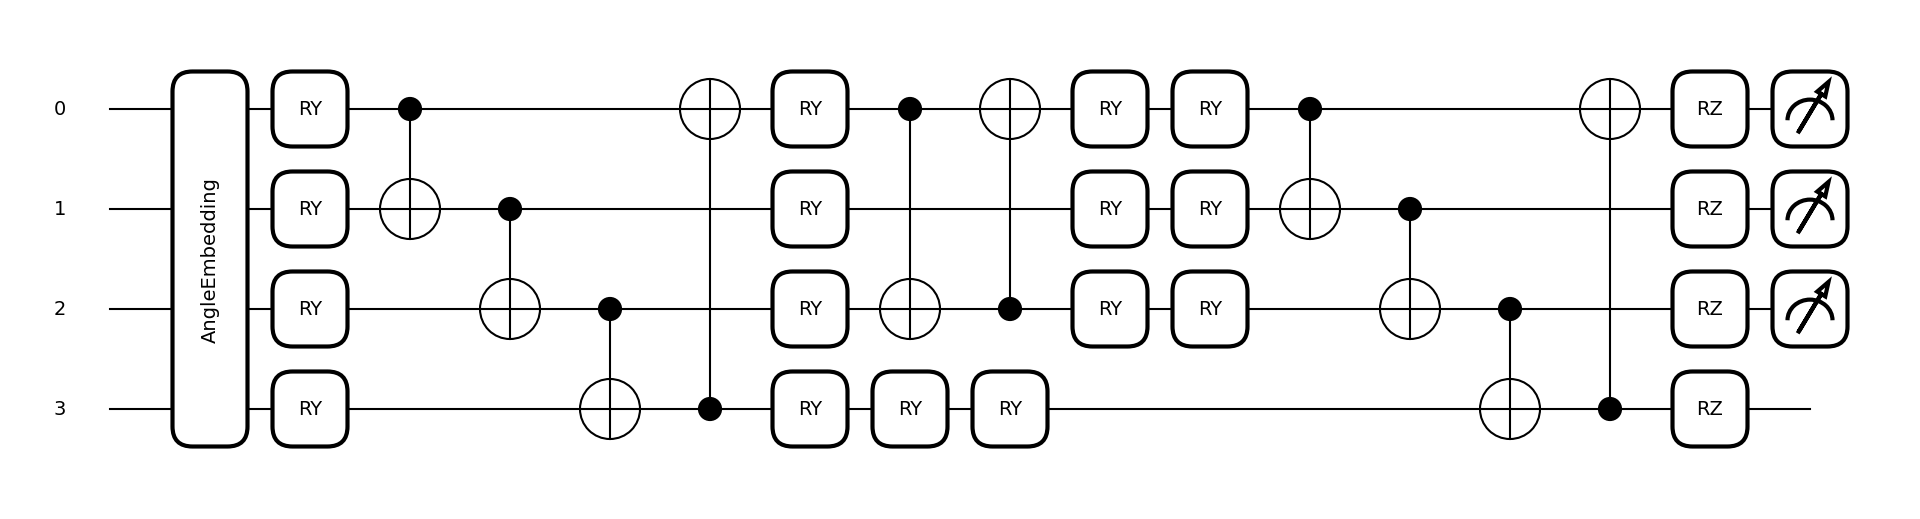

In [133]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()

In [134]:
n_layers = 1
n_qubits=3
total_weights_long = 36
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 36


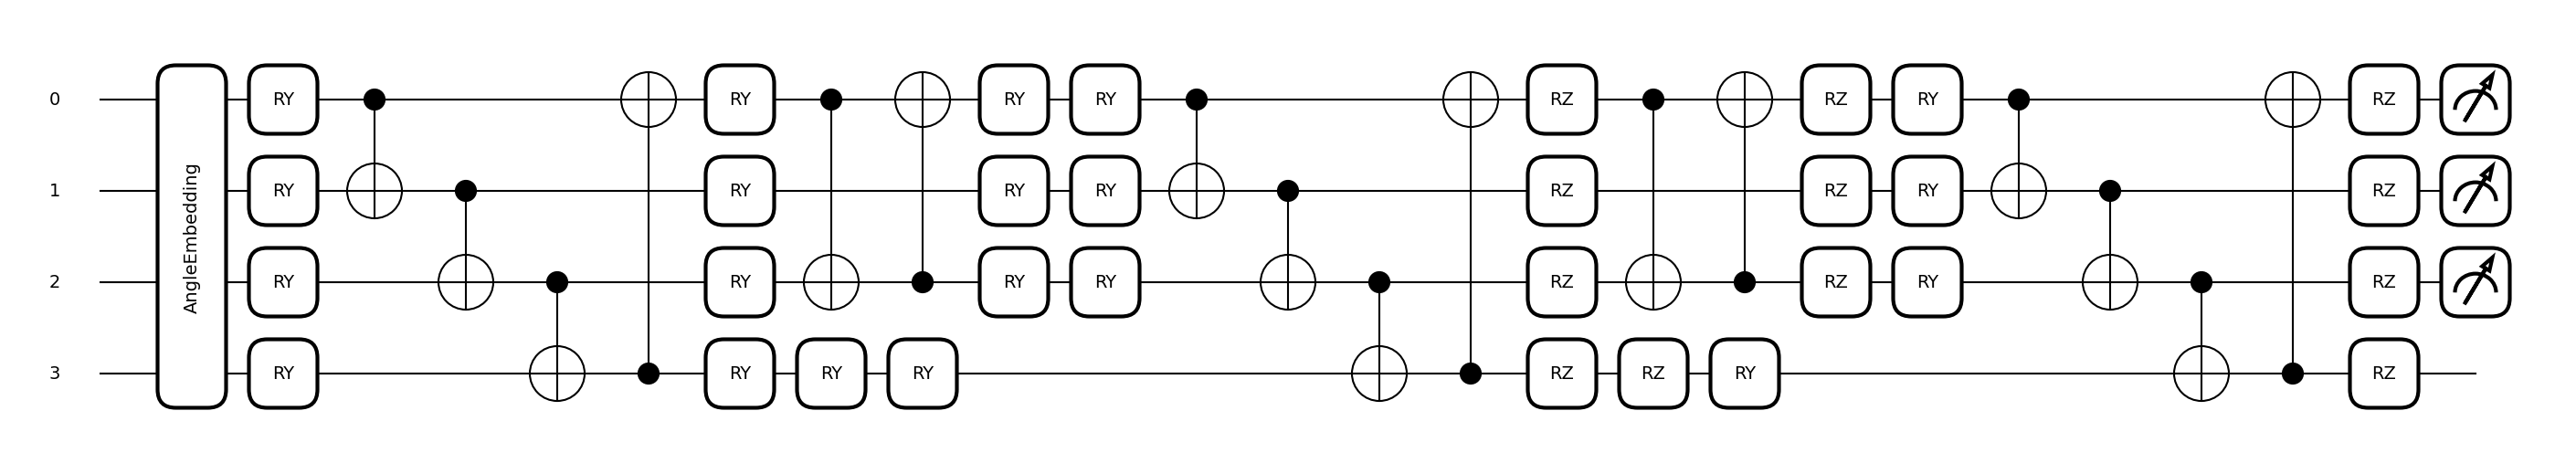

In [135]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X[:, :4], weights)

plt.show()

In [136]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [137]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [138]:
from sklearn.metrics import classification_report

In [139]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [140]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [141]:
import pandas as pd

X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

X_train_df.to_csv('X_train.csv', index=False)
Y_train_df.to_csv('y_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

In [145]:
model_dir = "Experiment_Long_Layer_Models"
os.makedirs(model_dir, exist_ok=True)
q_all_train_loss = []
q_all_val_loss = []
print("Evaluating Quantum Model")

for i in range(5):
    quantum_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        qlayer_long,
        Dense(2, activation=tf.nn.softmax)
    ])

    quantum_model.compile(optimizer=Adam(learning_rate=0.01), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

    with tf.device('/CPU:0'):
        history = quantum_model.fit(X_train, y_train, 
                          validation_split=0.2, 
                          batch_size=256, 
                          epochs=5, 
                          shuffle=True, 
                          verbose=1)
        
    eval.evaluate_model(quantum_model, X_test, y_test)
    # Save model weights
    weights_path = os.path.join(model_dir, f"quantum_model_iteration_{i+1}_weights.h5")
    quantum_model.save_weights(weights_path)
    print(f"Iteration {i+1}: Model weights saved successfully at {weights_path}.")
    print("=" * 100)
    
    # Store loss values for plotting later
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    q_all_train_loss.append(train_loss)
    q_all_val_loss.append(val_loss)

Evaluating Quantum Model
Epoch 1/5
570/570 [==============================] - 59s 103ms/step - loss: 0.1444 - accuracy: 0.9543 - val_loss: 0.0887 - val_accuracy: 0.9716
Epoch 2/5
570/570 [==============================] - 60s 106ms/step - loss: 0.0733 - accuracy: 0.9764 - val_loss: 0.0591 - val_accuracy: 0.9787
Epoch 3/5
570/570 [==============================] - 60s 105ms/step - loss: 0.0525 - accuracy: 0.9816 - val_loss: 0.0471 - val_accuracy: 0.9817
Epoch 4/5
570/570 [==============================] - 63s 110ms/step - loss: 0.0499 - accuracy: 0.9820 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 5/5
475/475 [==============================] - 16s 34ms/step
Confusion Matrix:
[[55090   128]
 [ 1120  4430]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     55218
         1.0       0.97      0.80      0.88      5550

    accuracy                           0.98     60768
   macro avg       0.98      0.90      0.

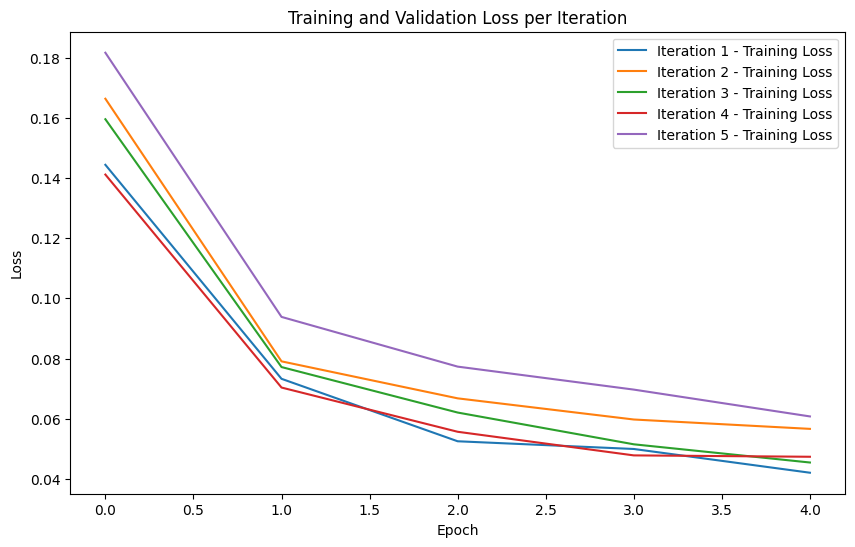

In [147]:
# Plot the training and validation loss after all iterations
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(q_all_train_loss[i], label=f'Iteration {i+1} - Training Loss')
    # plt.plot(q_all_val_loss[i], label=f'Iteration {i+1} - Validation Loss')

plt.title('Training and Validation Loss per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [149]:
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

model_dir = "Experiment_Long_Layer_Models"
os.makedirs(model_dir, exist_ok=True)

# Keep track of losses across all iterations
all_train_loss = []
all_val_loss = []

print("Evaluating Classical Model")
for i in range(5):
    # Build a simple model (change architecture as you see fit)
    classical_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(2, activation=tf.nn.softmax)
    ])

    classical_model.compile(
        optimizer=Adam(learning_rate=0.01), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )

    with tf.device('/CPU:0'):
        history = classical_model.fit(
            X_train, 
            y_train, 
            validation_split=0.2, 
            batch_size=256, 
            epochs=5, 
            shuffle=True, 
            verbose=1
        )
    
    # Evaluate on test set (some custom evaluation function)
    eval.evaluate_model(classical_model, X_test, y_test)
    
    # Save model weights
    weights_path = os.path.join(model_dir, f"classical_model_iteration_{i+1}_weights.h5")
    classical_model.save_weights(weights_path)
    print(f"Iteration {i+1}: Model weights saved successfully at {weights_path}.")
    print("=" * 100)
    
    # Store loss values for plotting later
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)

Evaluating Classical Model
Epoch 1/5
 44/570 [=>............................] - ETA: 1s - loss: 0.5365 - accuracy: 0.8046

2025-01-29 21:12:16.855726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


558/570 [============================>.] - ETA: 0s - loss: 0.1598 - accuracy: 0.9479

2025-01-29 21:12:18.331527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - 2s 3ms/step - loss: 0.1581 - accuracy: 0.9484 - val_loss: 0.0844 - val_accuracy: 0.9697
Epoch 2/5
570/570 [==============================] - 2s 3ms/step - loss: 0.0794 - accuracy: 0.9727 - val_loss: 0.0692 - val_accuracy: 0.9742
Epoch 3/5
570/570 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.9776 - val_loss: 0.0625 - val_accuracy: 0.9791
Epoch 4/5
570/570 [==============================] - 2s 3ms/step - loss: 0.0570 - accuracy: 0.9803 - val_loss: 0.0520 - val_accuracy: 0.9811
Epoch 5/5
131/475 [=======>......................] - ETA: 0s

2025-01-29 21:12:24.954581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


475/475 [==============================] - 1s 1ms/step
Confusion Matrix:
[[54881   337]
 [  674  4876]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     55218
         1.0       0.94      0.88      0.91      5550

    accuracy                           0.98     60768
   macro avg       0.96      0.94      0.95     60768
weighted avg       0.98      0.98      0.98     60768


Accuracy: 0.983362954186414
Recall: 0.8785585585585586
F1 Score: 0.9060670816686798
Iteration 1: Model weights saved successfully at Experiment_Long_Layer_Models/classical_model_iteration_1_weights.h5.
Epoch 1/5
 43/570 [=>............................] - ETA: 1s - loss: 0.4251 - accuracy: 0.8636

2025-01-29 21:12:25.736558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


556/570 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9537

2025-01-29 21:12:27.267899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - 2s 3ms/step - loss: 0.1441 - accuracy: 0.9541 - val_loss: 0.0898 - val_accuracy: 0.9688
Epoch 2/5
570/570 [==============================] - 2s 3ms/step - loss: 0.0808 - accuracy: 0.9724 - val_loss: 0.0757 - val_accuracy: 0.9732
Epoch 3/5
570/570 [==============================] - 2s 3ms/step - loss: 0.0706 - accuracy: 0.9754 - val_loss: 0.0679 - val_accuracy: 0.9755
Epoch 4/5
570/570 [==============================] - 2s 3ms/step - loss: 0.0677 - accuracy: 0.9758 - val_loss: 0.0624 - val_accuracy: 0.9784
Epoch 5/5
131/475 [=======>......................] - ETA: 0s

2025-01-29 21:12:33.852508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


475/475 [==============================] - 1s 1ms/step
Confusion Matrix:
[[55071   147]
 [ 1279  4271]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     55218
         1.0       0.97      0.77      0.86      5550

    accuracy                           0.98     60768
   macro avg       0.97      0.88      0.92     60768
weighted avg       0.98      0.98      0.98     60768


Accuracy: 0.9765337019483938
Recall: 0.7695495495495496
F1 Score: 0.8569422150882825
Iteration 2: Model weights saved successfully at Experiment_Long_Layer_Models/classical_model_iteration_2_weights.h5.
Epoch 1/5
 45/570 [=>............................] - ETA: 1s - loss: 0.3167 - accuracy: 0.8939

2025-01-29 21:12:34.638415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - ETA: 0s - loss: 0.1448 - accuracy: 0.9516

2025-01-29 21:12:36.076711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - 2s 3ms/step - loss: 0.1448 - accuracy: 0.9516 - val_loss: 0.0997 - val_accuracy: 0.9660
Epoch 2/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.9709 - val_loss: 0.0755 - val_accuracy: 0.9745
Epoch 3/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0722 - accuracy: 0.9747 - val_loss: 0.0686 - val_accuracy: 0.9771
Epoch 4/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9755 - val_loss: 0.0627 - val_accuracy: 0.9787
Epoch 5/5
136/475 [=======>......................] - ETA: 0s

2025-01-29 21:12:42.241200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


475/475 [==============================] - 1s 1ms/step
Confusion Matrix:
[[54740   478]
 [  904  4646]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     55218
         1.0       0.91      0.84      0.87      5550

    accuracy                           0.98     60768
   macro avg       0.95      0.91      0.93     60768
weighted avg       0.98      0.98      0.98     60768


Accuracy: 0.977257767245919
Recall: 0.8371171171171171
F1 Score: 0.8705265130222972
Iteration 3: Model weights saved successfully at Experiment_Long_Layer_Models/classical_model_iteration_3_weights.h5.
Epoch 1/5
 45/570 [=>............................] - ETA: 1s - loss: 0.6046 - accuracy: 0.7404

2025-01-29 21:12:43.019596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


567/570 [============================>.] - ETA: 0s - loss: 0.1748 - accuracy: 0.9385

2025-01-29 21:12:44.420646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - 2s 3ms/step - loss: 0.1743 - accuracy: 0.9387 - val_loss: 0.0924 - val_accuracy: 0.9683
Epoch 2/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9709 - val_loss: 0.0775 - val_accuracy: 0.9691
Epoch 3/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9741 - val_loss: 0.0690 - val_accuracy: 0.9745
Epoch 4/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9749 - val_loss: 0.0634 - val_accuracy: 0.9759
Epoch 5/5
134/475 [=======>......................] - ETA: 0s

2025-01-29 21:12:50.508836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


475/475 [==============================] - 1s 1ms/step
Confusion Matrix:
[[54931   287]
 [ 1161  4389]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     55218
         1.0       0.94      0.79      0.86      5550

    accuracy                           0.98     60768
   macro avg       0.96      0.89      0.92     60768
weighted avg       0.98      0.98      0.98     60768


Accuracy: 0.9761716692996314
Recall: 0.7908108108108108
F1 Score: 0.8584001564639155
Iteration 4: Model weights saved successfully at Experiment_Long_Layer_Models/classical_model_iteration_4_weights.h5.
Epoch 1/5
 46/570 [=>............................] - ETA: 1s - loss: 0.3566 - accuracy: 0.8868

2025-01-29 21:12:51.273379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


548/570 [===========================>..] - ETA: 0s - loss: 0.1443 - accuracy: 0.9576

2025-01-29 21:12:52.649587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - 2s 3ms/step - loss: 0.1418 - accuracy: 0.9583 - val_loss: 0.0723 - val_accuracy: 0.9760
Epoch 2/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0653 - accuracy: 0.9783 - val_loss: 0.0588 - val_accuracy: 0.9798
Epoch 3/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9808 - val_loss: 0.0485 - val_accuracy: 0.9821
Epoch 4/5
570/570 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9828 - val_loss: 0.0438 - val_accuracy: 0.9840
Epoch 5/5
131/475 [=======>......................] - ETA: 0s

2025-01-29 21:12:58.798574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


475/475 [==============================] - 1s 1ms/step
Confusion Matrix:
[[55081   137]
 [  777  4773]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     55218
         1.0       0.97      0.86      0.91      5550

    accuracy                           0.98     60768
   macro avg       0.98      0.93      0.95     60768
weighted avg       0.98      0.98      0.98     60768


Accuracy: 0.9849591890468667
Recall: 0.86
F1 Score: 0.9126195028680688
Iteration 5: Model weights saved successfully at Experiment_Long_Layer_Models/classical_model_iteration_5_weights.h5.


In [99]:
import os

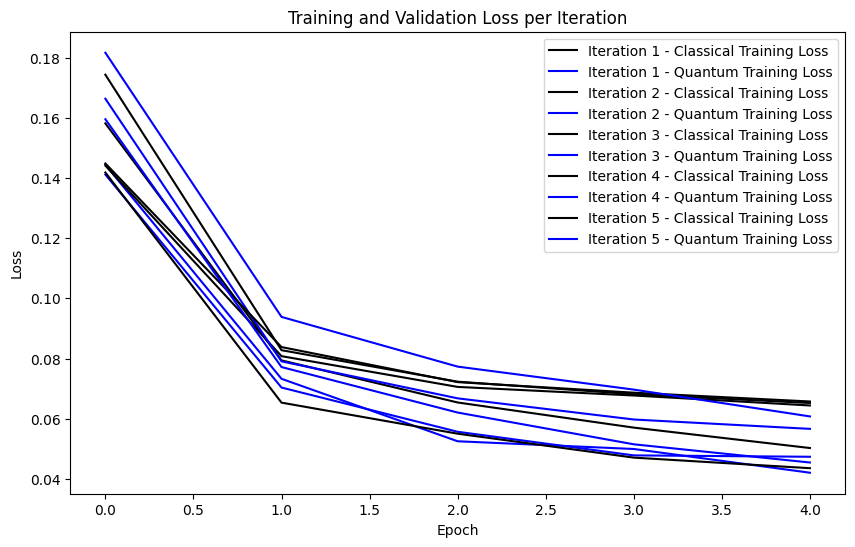

In [152]:
plt.figure(figsize=(10,6))


for i in range(5):
    plt.plot(all_train_loss[i], color='black', linestyle='-', label=f'Iteration {i+1} - Classical Training Loss')
    plt.plot(q_all_train_loss[i], color='blue', linestyle='-', label=f'Iteration {i+1} - Quantum Training Loss')

    # plt.plot(all_val_loss[i], label=f'Iteration {i+1} - Validation Loss')

plt.title('Training and Validation Loss per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
